# Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv('data/01Students.csv')
df = dataset.copy()
dataset.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [39]:
X = df.iloc[:, :-1]
Y = df.iloc[:,  -1]

In [40]:
y.shape

(30,)

In [36]:
# Create the Training and Test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =     \
train_test_split (X, Y, test_size = 0.3, random_state=1234)

In [41]:
print(f"X_test: {x_test.shape} X_train: {x_train.shape}")

X_test: (9, 1) X_train: (21, 1)


In [42]:
#Train the model
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()

In [43]:
std_reg.fit(x_train,y_train)

LinearRegression()

In [44]:
#Predictions
y_predict = std_reg.predict(x_test)

In [46]:
y_predict

array([49.35373808, 49.35373808, 39.29954842, 39.29954842, 84.54340191,
       49.35373808, 39.29954842, 74.48921224, 59.40792775])

In [47]:
#R-squared and equation of the line
slr_score = std_reg.score(x_test,y_test)
slr_score

0.8445283770796626

In [49]:
# Coefficient and Intercept
slr_coefficient = std_reg.coef_
slr_intercept = std_reg.intercept_
print("slr_intercept",slr_intercept,"slr_coefficient",slr_coefficient)
# Equation of the line
#   y = 34.27 + 5.02 * X

slr_intercept 34.272453587556456 slr_coefficient [5.02709483]


In [50]:
#RMSE Root Mean Squared Error
# Calculate the errors using RMSE 
from sklearn.metrics import mean_squared_error
import math

slr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [51]:
slr_rmse

7.228680413688949

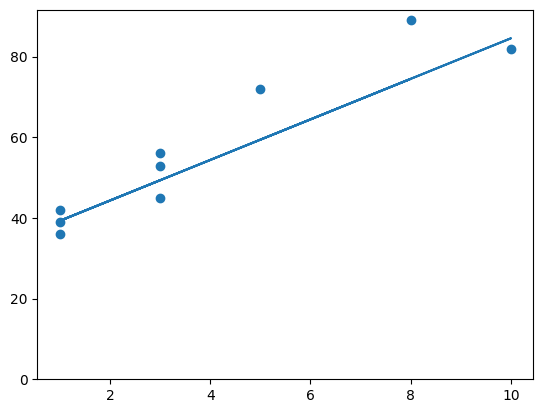

In [52]:
# plot the result using matplotlib 
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict)
plt.ylim(ymin=0)
plt.show()

# Multiple Linear Regression

In [4]:
#Multiple Linear Regression
dataset = pd.read_csv('data/02Students.csv')
df = dataset.copy()
dataset.head()

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42


In [5]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [8]:
# Create the Training and Test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =     \
train_test_split (x, y, test_size = 0.3, random_state=1234)

In [9]:
print(f"X_test: {x_test.shape} X_train: {x_train.shape}")

X_test: (9, 2) X_train: (21, 2)


In [11]:
#Train the model # smae linear than simple linear
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()

In [12]:
std_reg.fit(x_train,y_train)

LinearRegression()

In [13]:
#Predictions
y_predict = std_reg.predict(x_test)

In [14]:
y_predict

array([45.76085662, 55.91055579, 46.57952582, 41.50467624, 88.56916066,
       50.8357062 , 46.57952582, 79.2381307 , 65.24158575])

In [15]:
#R-squared and equation of the line
mlr_score = std_reg.score(x_test,y_test)
mlr_score

0.9014449991870028

In [16]:
# Coefficient and Intercept
mlr_coefficient = std_reg.coef_
mlr_intercept = std_reg.intercept_
print("mlr_intercept",mlr_intercept,"mlr_coefficient",mlr_coefficient)
# Equation of the line
#   y = 1.31 + 4.67*hours + 5.1*shours

mlr_intercept 1.3152141538095208 mlr_coefficient [4.66551498 5.07484959]


In [18]:
#RMSE Root Mean Squared Error
# Calculate the errors using RMSE 
from sklearn.metrics import mean_squared_error
import math

mlr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [19]:
mlr_rmse

5.75536394161202

# Autocorrelation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
f = pd.read_csv('data/03+-+corr.csv')
f.head()

,t0
0,8
1,14
2,36
3,56
4,84


In [24]:
f['t0'] = pd.to_numeric(f['t0'],downcast='float')

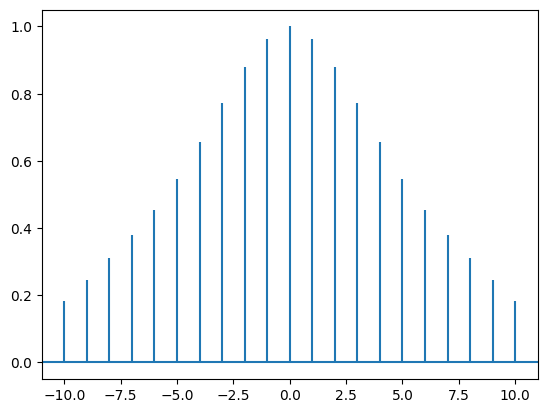

In [25]:
plt.acorr(f['t0'],maxlags=10)
plt.show()

In [27]:
#Use pandas shift function to create a timelag dataset
#t_1,t_2
t_1=f['t0'].shift(+1).to_frame()
t_1.head()

,t0
0,NaN
1,8.0
2,14.0
3,36.0
4,56.0


In [28]:
t_2=f['t0'].shift(+2).to_frame()
t_2.head()

,t0
0,NaN
1,NaN
2,8.0
3,14.0
4,36.0
